In [111]:
import json

import matplotlib.pyplot as plt
import pandas as pd
from snowflake.snowpark import *
from snowflake.snowpark import version
from snowflake.snowpark.functions import *
from snowflake.snowpark.udf import UDFRegistration

In [112]:
connection_parameters = json.load(open('connection.json'))    
session = Session.builder.configs(connection_parameters).create()

print(session.sql("select current_warehouse(), current_database(), current_schema(), current_user(), current_role()").collect())

# Print the current version of the Snowpark library
print(version.VERSION)

[Row(CURRENT_WAREHOUSE()='DEV_WH', CURRENT_DATABASE()='CREDIT_BANK', CURRENT_SCHEMA()='PUBLIC', CURRENT_USER()='ARTI6076', CURRENT_ROLE()='ACCOUNTADMIN')]
(1, 11, 1)


1. Data Exploration

In [113]:
credit_df = session.table("CREDIT_FILES")

In [114]:
type(credit_df)

snowflake.snowpark.table.Table

In [115]:
credit_df.describe().toPandas()

,SUMMARY,CREDIT_REQUEST_ID,CREDIT_AMOUNT,CREDIT_DURATION,PURPOSE,INSTALLMENT_COMMITMENT,OTHER_PARTIES,CREDIT_STANDING,CREDIT_SCORE,CHECKING_BALANCE,...,ASSETS,HOUSING,QUALIFICATION,JOB_HISTORY,AGE,SEX,MARITAL_STATUS,NUM_DEPENDENTS,RESIDENCE_SINCE,OTHER_PAYMENT_PLANS
0,count,2940.000000,2940.000000,2940.000000,2940,2940.00000,271,2940,2940.000000,2940.000000,...,2489,2940,2940,2940.000000,2940.000000,2940,2940,2940.000000,2940.000000,2940
1,mean,1502.253061,32593.571429,20.885034,None,2.97449,None,None,603.929592,344.497456,...,None,None,None,5.726531,35.914286,None,None,1.155442,2.847279,None
2,stddev,865.281708,27992.343428,12.049816,None,1.11702,None,None,149.279673,1065.638529,...,None,None,None,6.589818,11.246207,None,None,0.362388,1.103742,None
3,min,1.000000,2500.000000,4.000000,Business,1.00000,Co-Applicant,bad,200.000000,-999.460000,...,Home,free,highly skilled,0.000000,19.000000,F,Divorced,1.000000,1.000000,bank
4,max,3000.000000,184240.000000,72.000000,Vehicle,4.00000,Guarantor,good,799.000000,4992.000000,...,Vehicle,rent,unskilled,25.000000,75.000000,M,Single,2.000000,4.000000,stores


In [116]:
credit_df.toPandas()

,CREDIT_REQUEST_ID,CREDIT_AMOUNT,CREDIT_DURATION,PURPOSE,INSTALLMENT_COMMITMENT,OTHER_PARTIES,CREDIT_STANDING,CREDIT_SCORE,CHECKING_BALANCE,SAVINGS_BALANCE,...,ASSETS,HOUSING,QUALIFICATION,JOB_HISTORY,AGE,SEX,MARITAL_STATUS,NUM_DEPENDENTS,RESIDENCE_SINCE,OTHER_PAYMENT_PLANS
0,147,8600,6,Vehicle,1,None,good,466,-728.12,17.00,...,None,own,skilled,15,39,F,Married,1,4,none
1,248,12040,6,Vehicle,4,None,good,202,0.00,2443.00,...,None,rent,skilled,1,35,M,Single,1,1,bank
2,112,3920,15,Tuition,4,None,good,736,4696.00,143.00,...,Investments,rent,skilled,1,23,F,Married,1,4,none
3,222,12000,12,Tuition,4,None,good,732,-25.35,0.00,...,Investments,rent,skilled,3,23,F,Married,1,4,bank
4,162,10550,18,Vehicle,4,None,good,507,0.00,510.00,...,Investments,own,skilled,1,30,F,Married,1,1,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2311,53810,48,Other,3,None,good,726,1505.00,0.00,...,None,free,unemployed,0,40,M,Single,1,4,bank
2936,2775,14800,12,Vehicle,2,None,good,343,4486.00,7361.86,...,None,free,unemployed,0,66,M,Single,1,4,bank
2937,2188,11750,16,Vehicle,2,None,good,396,720.00,460.00,...,Vehicle,free,unemployed,0,68,M,Single,1,3,none
2938,2000,45760,45,Vehicle,3,None,good,523,752.00,1444.00,...,Vehicle,own,skilled,0,27,M,Single,1,4,none


array([[<Axes: title={'center': 'CREDIT_REQUEST_ID'}>,
        <Axes: title={'center': 'CREDIT_AMOUNT'}>,
        <Axes: title={'center': 'CREDIT_DURATION'}>],
       [<Axes: title={'center': 'INSTALLMENT_COMMITMENT'}>,
        <Axes: title={'center': 'CREDIT_SCORE'}>,
        <Axes: title={'center': 'CHECKING_BALANCE'}>],
       [<Axes: title={'center': 'SAVINGS_BALANCE'}>,
        <Axes: title={'center': 'EXISTING_CREDITS'}>,
        <Axes: title={'center': 'JOB_HISTORY'}>],
       [<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'NUM_DEPENDENTS'}>,
        <Axes: title={'center': 'RESIDENCE_SINCE'}>]], dtype=object)

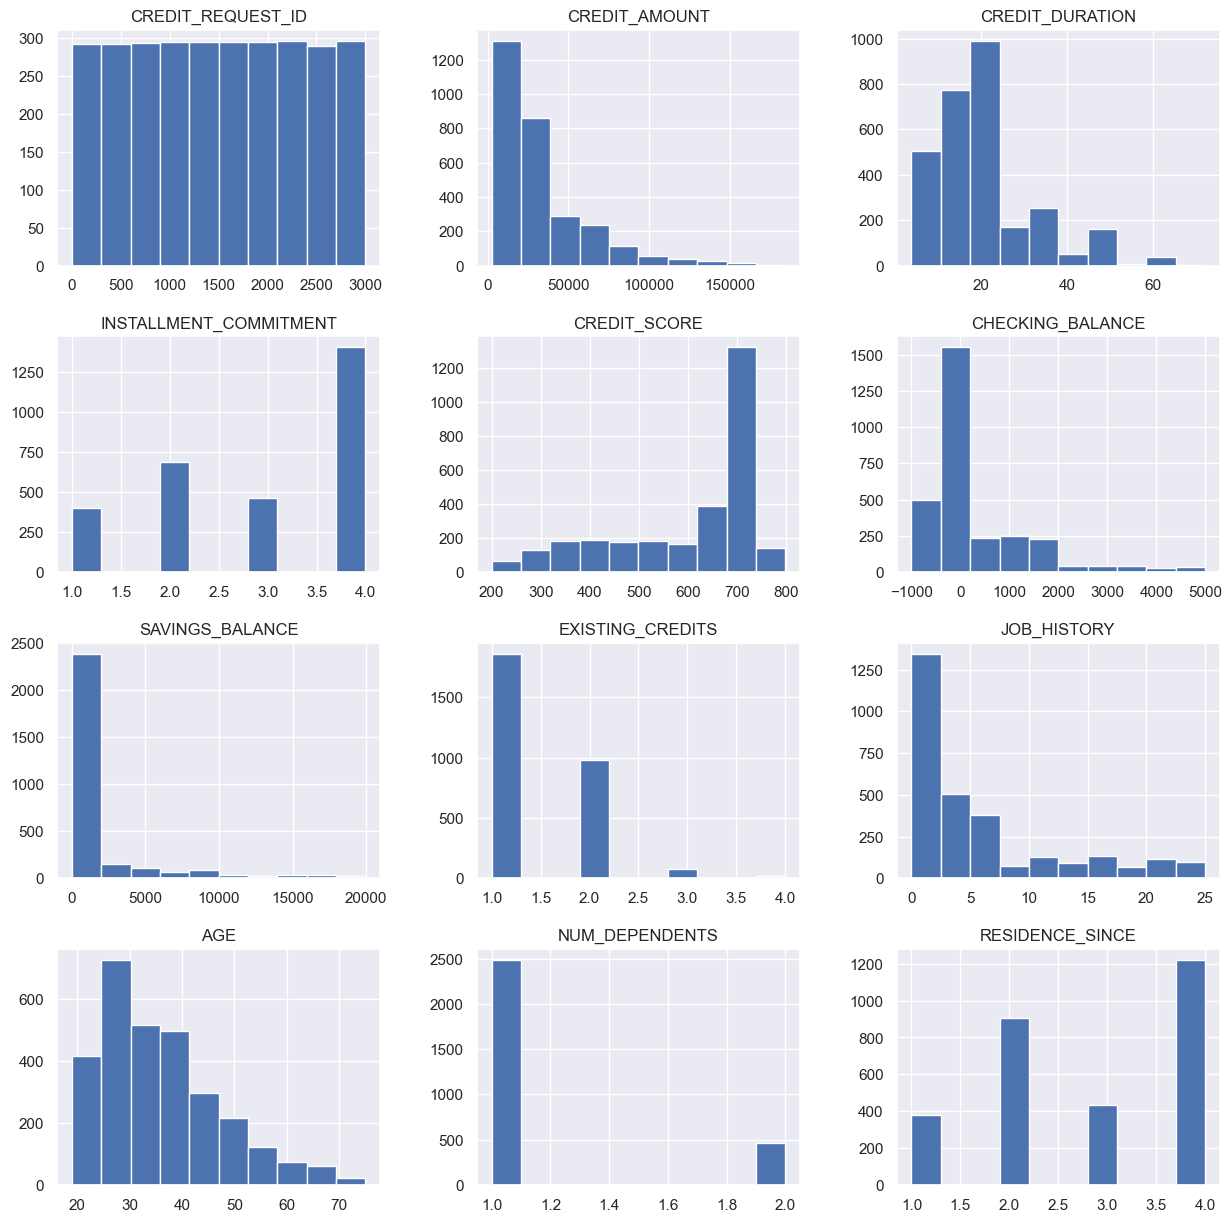

In [117]:
credit_df.toPandas().hist(figsize=(15,15))

From above visualization, we can see a few interesting characteristics:
Most of the credit requests are for small amounts (< 50k)
Most of the credit terms are 20 months or less.
Most of the applicants have a very good credit score.
Most of the applicants do not have a lot of balance in either credits or savings with Snowbank.
Most of the applicants are less than 40 years old.

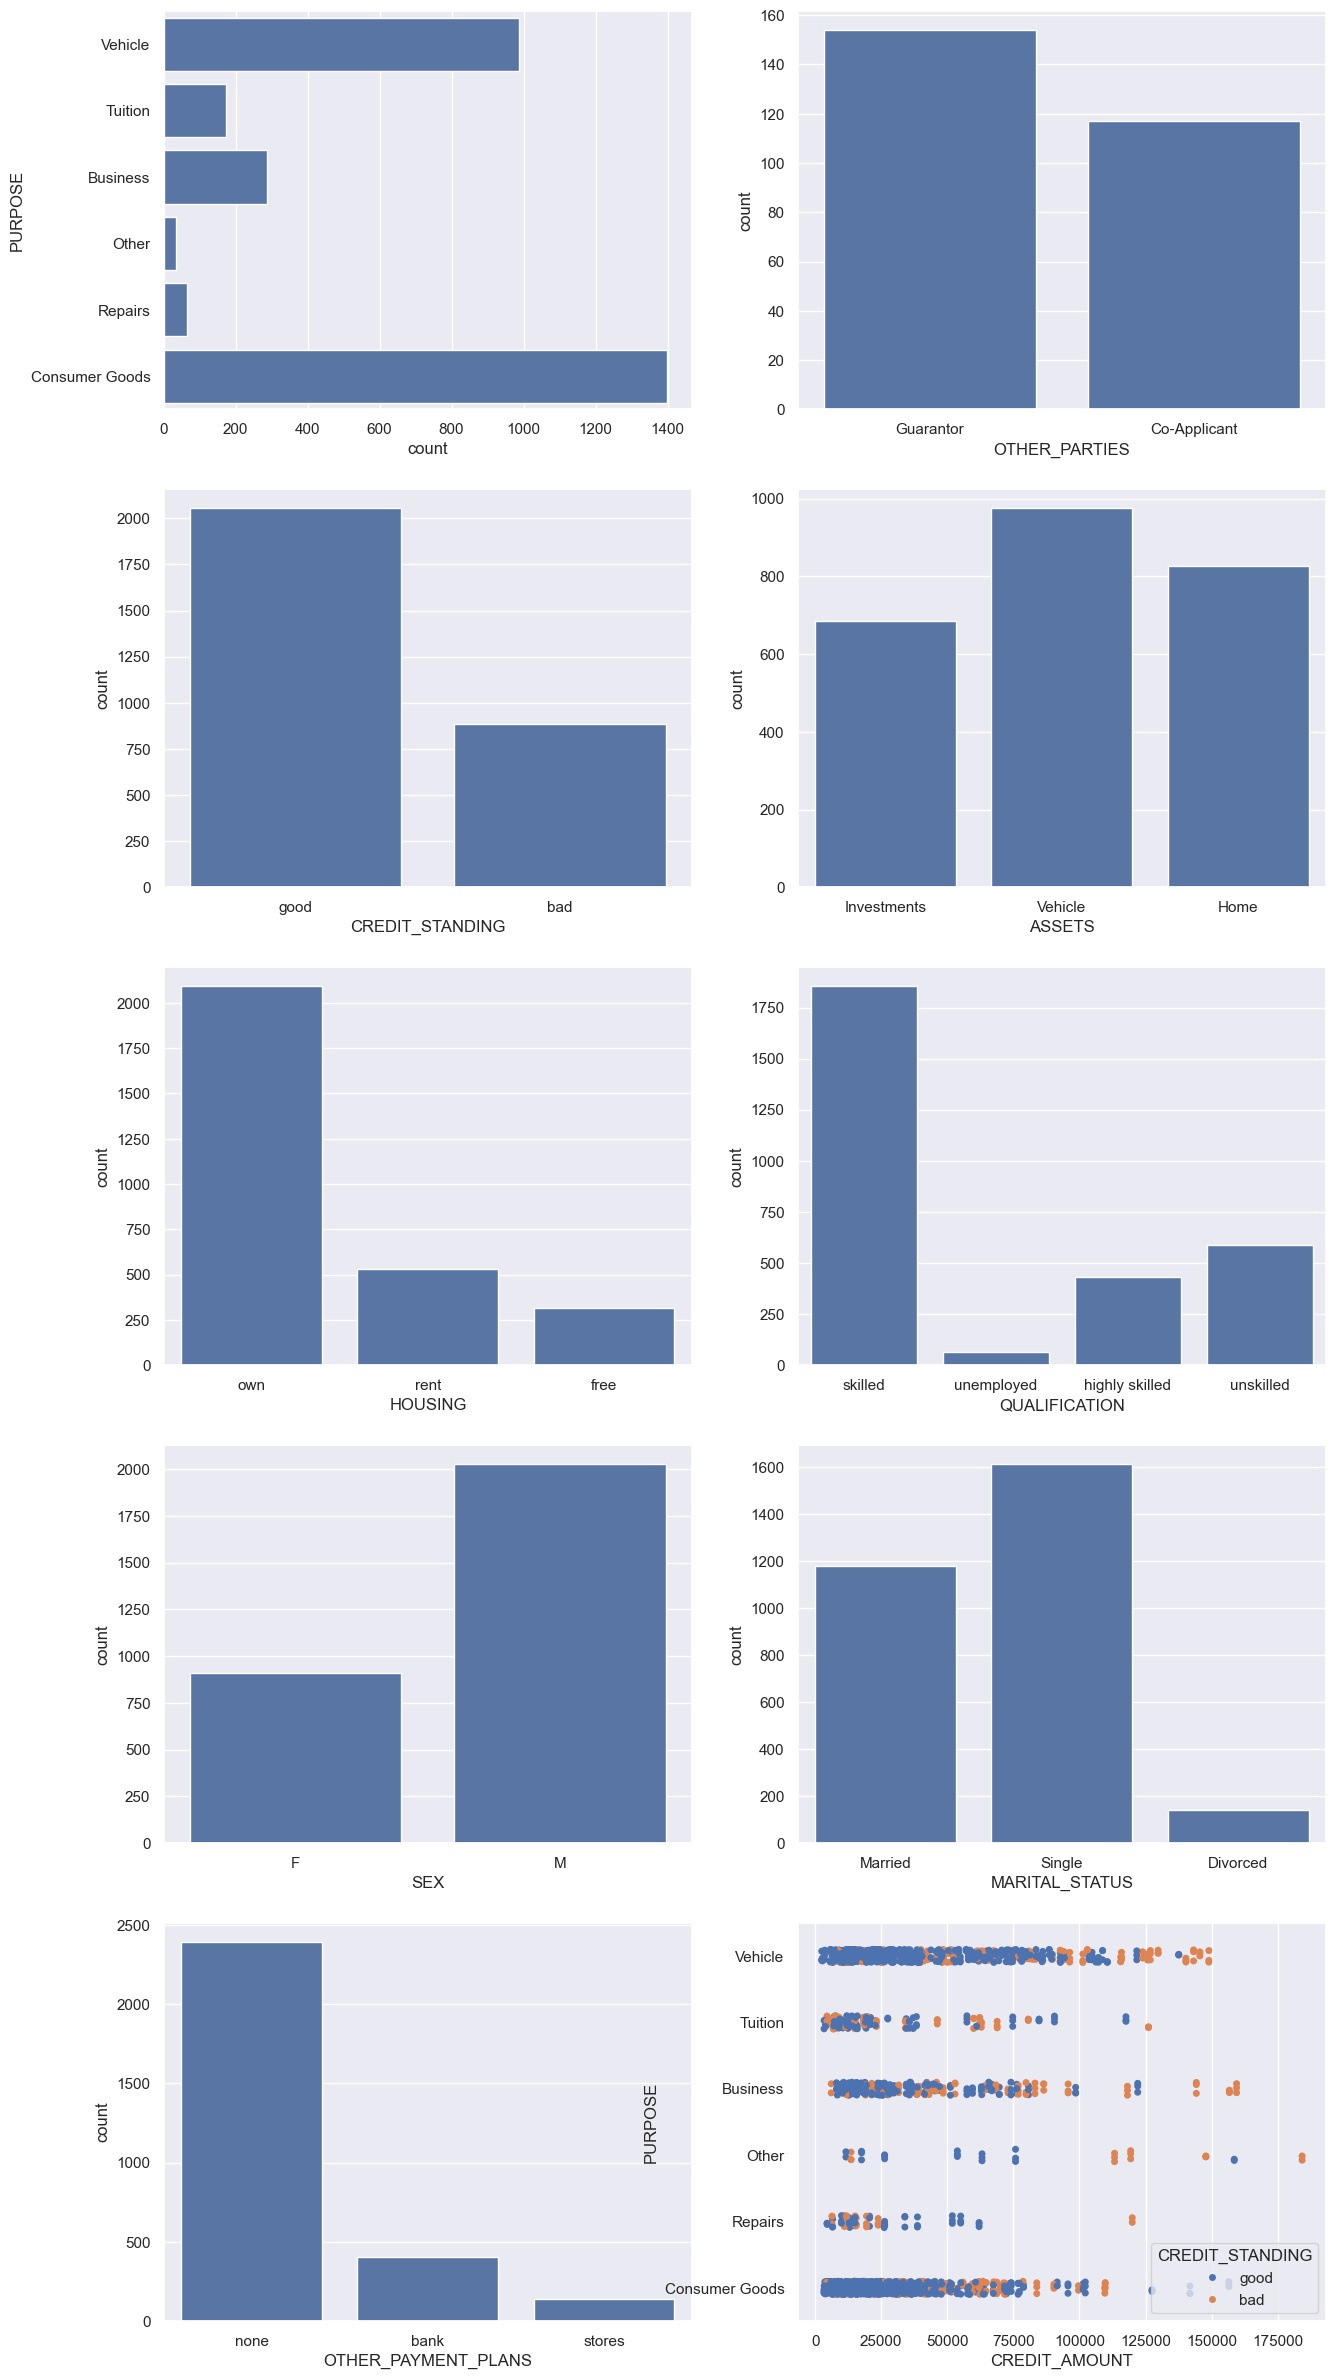

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")


fig, axs = plt.subplots(5, 2, figsize=(15, 30))
df = credit_df.toPandas()
sns.countplot(data=df, y="PURPOSE", ax=axs[0,0])
sns.countplot(data=df, x="OTHER_PARTIES", ax=axs[0,1])
sns.countplot(data=df, x="CREDIT_STANDING", ax=axs[1,0])
sns.countplot(data=df, x="ASSETS", ax=axs[1,1])
sns.countplot(data=df, x="HOUSING", ax=axs[2,0])
sns.countplot(data=df, x="QUALIFICATION", ax=axs[2,1])
sns.countplot(data=df, x="SEX", ax=axs[3,0])
sns.countplot(data=df, x="MARITAL_STATUS", ax=axs[3,1])
sns.countplot(data=df, x="OTHER_PAYMENT_PLANS", ax=axs[4,0])
sns.stripplot(y="PURPOSE", x="CREDIT_AMOUNT", data=df, hue='CREDIT_STANDING', jitter=True, ax=axs[4,1])
plt.show()

From above visualization, we can see :
Most of the popular credit requests are related to either a vehicle purchase or consumer goods.
The vast majority of loans do not have guarantors, nor co-applicants.
Most of credit in file is in good standing.
The majority of the applicants are male, foreign workers, and skilled who own their own house/apartment.
Higher amounts of loans (which threshold varies per category of loan) have a higher chance of defaulting.

let's try to determine the range of f loans per different category via snowflake query

In [119]:
df_loan_status = credit_df.select(col("PURPOSE"),col("CREDIT_AMOUNT"))\
                          .groupBy(col("PURPOSE"))\
                          .agg([min(col("CREDIT_AMOUNT")).as_("MIN_CREDIT_AMOUNT"), max(col("CREDIT_AMOUNT")).as_("MAX_CREDIT_AMOUNT"), median(col("CREDIT_AMOUNT")).as_("MED_CREDIT_AMOUNT"),avg(col("CREDIT_AMOUNT")).as_("AVG_CREDIT_AMOUNT")])\
                          .sort(col("PURPOSE"))
df_loan_status.toPandas()

,PURPOSE,MIN_CREDIT_AMOUNT,MAX_CREDIT_AMOUNT,MED_CREDIT_AMOUNT,AVG_CREDIT_AMOUNT
0,Business,6090,159450,31610.0,41863.146853
1,Consumer Goods,3380,156530,21080.0,26791.788269
2,Other,11640,184240,63140.0,78815.454545
3,Repairs,4540,119980,15550.0,25854.769231
4,Tuition,3390,126120,15970.0,29122.965116
5,Vehicle,2500,148960,26745.0,37633.569980


2. Data Transformation and Encoding
For the current use case, in order to prepare the data for machine learning, we need to encode the categorical values into numerical.

In order to achieve this, we can leverage Snowflake compute by defining Python named UDFs in order to perform the encoding.

In [120]:
session.sql("create or replace stage credit_bank.public.fnstage encryption = (type = 'SNOWFLAKE_SSE')").collect()

[Row(status='Stage area FNSTAGE successfully created.')]

In [121]:
@udf(name="PURPOSE_Encode", is_permanent=True, stage_location="@fnstage", replace=True, session=session)
def Purpose_Encode(x : str) -> int:
  if x == "Consumer Goods":
    return 1
  elif x == "Vehicle":
    return 2
  elif x == "Tuition":
    return 3
  elif x == "Business":
    return 4
  elif x == "Repairs":
    return 5
  else:
    return 0

@udf(name="OTHER_PARTIES_Encode", is_permanent=True, stage_location="@fnstage", replace=True, session=session)
def Other_Parties_Encode(x : str) -> int:
  if x == "Guarantor":
    return 1
  elif x == "Co-Applicant":
    return 2
  else:
    return 0

@udf(name="CREDIT_STANDING_Encode", is_permanent=True, stage_location="@fnstage", replace=True, session=session)
def Credit_Standing_Encode(x : str) -> int:
  if x == "good":
    return 1
  else:
    return 0

@udf(name="ASSETS_Encode", is_permanent=True, stage_location="@fnstage", replace=True, session=session)
def Assets_Encode(x : str) -> int:
  if x == "Vehicle":
    return 1
  elif x == "Investments":
    return 2
  elif x == "Home":
    return 3
  else:
    return 0

@udf(name="HOUSING_Encode", is_permanent=True, stage_location="@fnstage", replace=True, session=session)
def Housing_Encode(x : str) -> int:
  if x == "rent":
    return 1
  elif x == "own":
    return 2
  else:
    return 0

@udf(name="QUALIFICATION_Encode", is_permanent=True, stage_location="@fnstage", replace=True, session=session)
def Qualification_Encode(x : str) -> int:
  if x == "unskilled":
    return 1
  elif x == "skilled":
    return 2
  elif x == "highly skilled":
    return 3
  else:
    return 0

@udf(name="SEX_Encode", is_permanent=True, stage_location="@fnstage", replace=True, session=session)
def Sex_Encode(x : str) -> int:
  if x == "M":
    return 1
  else:
    return 0

@udf(name="MARITAL_STATUS_Encode", is_permanent=True, stage_location="@fnstage", replace=True, session=session)
def Marital_Status_Encode(x : str) -> int:
 if x == "Married":
    return 1
 elif x == "Single":
    return 2
 else:
    return 0


@udf(name="OTHER_PAYMENT_PLANS_Encode", is_permanent=True, stage_location="@fnstage", replace=True, session=session)
def Other_Payment_Plans_Encode(x : str) -> int:
  if x == "bank":
    return 1
  elif x == "stores":
    return 2
  else:
    return 0

@udf(name="CREDIT_SCORE_Decode", is_permanent=True, stage_location="@fnstage", replace=True, session=session)
def Credit_Score_Decode(x : int) -> str:
  if x == 1:
    return "Approved"
  else:
    return "Denied"

invoke the UDF through the Snowpark API as follows:

In [122]:
#df=credit_df.select(col("PURPOSE"), \
 #                   Purpose_Encode(col("PURPOSE")).as_("PURPOSE_ENCODED")) \
 #                   .groupBy(col("PURPOSE"),col("PURPOSE_ENCODED")) \
  #                  .agg((count("PURPOSE")).alias("COUNT"))
#
#d#f.toPandas()

an example of python vectorized udf

In [123]:
#from snowflake.snowpark.types import PandasDataFrame, PandasSeries

#@udf(name="CREDIT_SCORE_Decode", is_permanent=True, stage_location="@fnstage", replace=True, session=session)
#def Credit_Score_Decode(series: PandasSeries[int])-> PandasSeries[str]:
    #return series.apply(lambda x: "Approved" if (x == 1) else "Denied")

test above vectorized function

In [124]:
#df1 = session.createDataFrame([1,0,1]).to_df("a")

#df1.select(Credit_Score_Decode("a")).collect()

prepare a feature matrix for a Random Forest Classifier Model.

In [125]:
feature_matrix = credit_df.select(
                                   Purpose_Encode(col("PURPOSE")).as_("PURPOSE_CODE"), 
                                   Qualification_Encode(col("QUALIFICATION")).as_("QUALIFICATION_CODE"), 
                                   Other_Parties_Encode(col("OTHER_PARTIES")).as_("OTHER_PARTIES_CODE"),
                                   Other_Payment_Plans_Encode(col("OTHER_PAYMENT_PLANS")).as_("OTHER_PAYMENT_PLANS_CODE"),
                                   Housing_Encode(col("HOUSING")).as_("HOUSING_CODE"),
                                   Assets_Encode(col("ASSETS")).as_("ASSETS_CODE"),
                                   Sex_Encode(col("SEX")).as_("SEX_CODE"),
                                   Marital_Status_Encode(col("MARITAL_STATUS")).as_("MARITAL_STATUS_CODE"),
                                   Credit_Standing_Encode(col("CREDIT_STANDING")).as_("CREDIT_STANDING_CODE"),
                                   col("CHECKING_BALANCE"),
                                   col("SAVINGS_BALANCE"),
                                   col("AGE"),
                                   col("JOB_HISTORY"),
                                   col("CREDIT_SCORE"),
                                   col("CREDIT_DURATION"), 
                                   col("CREDIT_AMOUNT"),
                                   col("RESIDENCE_SINCE"),
                                   col("INSTALLMENT_COMMITMENT"),
                                   col("NUM_DEPENDENTS"),
                                   col("EXISTING_CREDITS")
                                 )          

In [126]:
df = feature_matrix.toPandas().astype(int)  #converting table to pandas df

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   PURPOSE_CODE              2940 non-null   int32
 1   QUALIFICATION_CODE        2940 non-null   int32
 2   OTHER_PARTIES_CODE        2940 non-null   int32
 3   OTHER_PAYMENT_PLANS_CODE  2940 non-null   int32
 4   HOUSING_CODE              2940 non-null   int32
 5   ASSETS_CODE               2940 non-null   int32
 6   SEX_CODE                  2940 non-null   int32
 7   MARITAL_STATUS_CODE       2940 non-null   int32
 8   CREDIT_STANDING_CODE      2940 non-null   int32
 9   CHECKING_BALANCE          2940 non-null   int32
 10  SAVINGS_BALANCE           2940 non-null   int32
 11  AGE                       2940 non-null   int32
 12  JOB_HISTORY               2940 non-null   int32
 13  CREDIT_SCORE              2940 non-null   int32
 14  CREDIT_DURATION           2940 non-null 

In [128]:
df.head()

,PURPOSE_CODE,QUALIFICATION_CODE,OTHER_PARTIES_CODE,OTHER_PAYMENT_PLANS_CODE,HOUSING_CODE,ASSETS_CODE,SEX_CODE,MARITAL_STATUS_CODE,CREDIT_STANDING_CODE,CHECKING_BALANCE,SAVINGS_BALANCE,AGE,JOB_HISTORY,CREDIT_SCORE,CREDIT_DURATION,CREDIT_AMOUNT,RESIDENCE_SINCE,INSTALLMENT_COMMITMENT,NUM_DEPENDENTS,EXISTING_CREDITS
0,3,2,0,0,1,2,0,1,1,4696,143,23,1,736,15,3920,4,4,1,1
1,2,2,0,0,2,2,1,2,1,0,0,31,1,693,18,33780,1,2,1,1
2,2,2,0,0,1,1,0,1,1,-634,124,28,3,734,15,14030,4,2,1,1
3,2,2,0,0,2,1,1,2,1,0,13073,27,2,587,27,86130,2,2,1,2
4,2,0,0,0,1,2,0,1,1,-600,6800,23,0,700,6,13520,2,1,1,1


3. Random Forest Model Training

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('CREDIT_STANDING_CODE',axis=1), 
                                                    df['CREDIT_STANDING_CODE'], test_size=0.30)

In [130]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()


4. Testing the Model

In [131]:
rfc_pred = rfc.predict(X_test)

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89       281
           1       0.92      0.99      0.95       601

    accuracy                           0.93       882
   macro avg       0.94      0.90      0.92       882
weighted avg       0.94      0.93      0.93       882



In [133]:
print(confusion_matrix(y_test,rfc_pred))

[[229  52]
 [  7 594]]


5. Export the Model within a Python UDF for Scoring

In [134]:
from joblib import dump, load

dump(rfc, './credit_score.joblib')

['./credit_score.joblib']

In [135]:

session.file.put("credit_score.joblib", "@fnstage", auto_compress=False, overwrite=True)

[PutResult(source='credit_score.joblib', target='credit_score.joblib', source_size=4520185, target_size=4520185, source_compression='NONE', target_compression='NONE', status='UPLOADED', message='')]

In [136]:
session.clear_imports()
session.add_import("@fnstage/credit_score.joblib")
#session.add_packages("joblib", "pandas", "scikit-learn")

In [137]:
@udf(name = 'credit_score', is_permanent = True, replace = True, stage_location = '@FNSTAGE', session = session, 
     packages=["joblib","pandas","scikit-learn"])
def credit_score(arg: list) -> int:
    import sys

    import joblib
    import pandas as pd

    IMPORT_DIRECTORY_NAME = "snowflake_import_directory"
    import_dir = sys._xoptions[IMPORT_DIRECTORY_NAME]
    pipe_file = import_dir + 'credit_score.joblib'
        
    pipeline = joblib.load(pipe_file)
    row = pd.DataFrame([arg], columns=[ 'PURPOSE_CODE',
                                        'QUALIFICATION_CODE',
                                        'OTHER_PARTIES_CODE',
                                        'OTHER_PAYMENT_PLANS_CODE',
                                        'HOUSING_CODE',
                                        'ASSETS_CODE',
                                        'SEX_CODE',
                                        'MARITAL_STATUS_CODE',
                                        'CHECKING_BALANCE',
                                        'SAVINGS_BALANCE',
                                        'AGE',
                                        'JOB_HISTORY',
                                        'CREDIT_SCORE',
                                        'CREDIT_DURATION',
                                        'CREDIT_AMOUNT',
                                        'RESIDENCE_SINCE',
                                        'INSTALLMENT_COMMITMENT',
                                        'NUM_DEPENDENTS',
                                        'EXISTING_CREDITS'])           
    return pipeline.predict(row)[0]

The version of package 'joblib' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'joblib'. Your UDF might not work when the package version is different between the server and your local environment.
The version of package 'pandas' in the local environment is 2.1.3, which does not fit the criteria for the requirement 'pandas'. Your UDF might not work when the package version is different between the server and your local environment.
The version of package 'scikit-learn' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'scikit-learn'. Your UDF might not work when the package version is different between the server and your local environment.


6. Performing Inference in Snowflake

we want to process an existing batch of 60 credit pending requests and provide an assessment on whether the loan should be approved or denied. 

In [138]:
df_cred_req = session.table("CREDIT_REQUESTS")
df_cred_req.toPandas()

,CREDIT_REQUEST_ID,CREDIT_AMOUNT,CREDIT_DURATION,PURPOSE,INSTALLMENT_COMMITMENT,OTHER_PARTIES,CREDIT_SCORE,CHECKING_BALANCE,SAVINGS_BALANCE,EXISTING_CREDITS,ASSETS,HOUSING,QUALIFICATION,JOB_HISTORY,AGE,SEX,MARITAL_STATUS,NUM_DEPENDENTS,RESIDENCE_SINCE,OTHER_PAYMENT_PLANS
0,182,44550,36,Business,2,None,656,259.00,628.00,2,Home,own,highly skilled,1,30,M,Divorced,1,2,stores
1,188,11750,16,Vehicle,2,None,549,1892.00,723.00,3,Vehicle,free,unemployed,0,68,M,Single,1,3,none
2,122,38680,24,Vehicle,4,None,356,0.00,586.00,2,Vehicle,rent,highly skilled,7,41,F,Married,1,2,none
3,245,34470,12,Tuition,4,None,749,0.00,8102.00,1,Home,own,unskilled,1,35,F,Married,2,3,none
4,447,18420,36,Vehicle,4,None,672,-463.77,428.00,1,Vehicle,own,skilled,1,34,F,Married,1,4,none
5,581,10560,18,Vehicle,3,Guarantor,479,1676.00,365.00,2,Home,own,skilled,18,36,M,Single,1,3,bank
6,716,75960,30,Vehicle,1,None,327,0.00,0.00,2,Vehicle,own,skilled,10,63,M,Single,1,4,none
7,285,38780,24,Vehicle,4,None,543,1555.00,1885.00,1,Vehicle,own,skilled,1,37,M,Divorced,1,2,none
8,328,15250,24,Vehicle,4,None,676,0.00,11818.00,1,Vehicle,own,skilled,5,34,F,Married,2,3,none
9,488,37570,24,Vehicle,4,Co-Applicant,716,0.00,493.00,1,None,free,skilled,12,62,F,Married,1,4,none


6.1 Develop Stored Procedure for scoring
As the bank receives the credit requests in near real-time, we want to write a stored procedure which could be called through a task to score micro-batches of requests as they come in.

The Python stored procedure will first build the input features for the model using the Snowpark API and invoke the Python UDF we built earlier for scoring.

In [140]:
from snowflake.snowpark.types import IntegerType

session.add_packages('snowflake-snowpark-python')

#@sproc(name="process_credit_requests", replace=True, is_permanent=True, stage_location="@fnstage")
def process_credit_requests_fn (session: snowflake.snowpark.Session, credit_requests: str, credit_assessment: str) -> int:
    
    #Build the input features for the model using the Snowpark API as well as the Python UDFs for encoding.
    df_cred_req = session.table(credit_requests).select( 
                            col("CREDIT_REQUEST_ID"), col("PURPOSE"), 
                            Purpose_Encode(col("PURPOSE")).as_("PURPOSE_CODE"),
                            Qualification_Encode(col("QUALIFICATION")).as_("QUALIFICATION_CODE"),
                            Other_Parties_Encode(col("OTHER_PARTIES")).as_("OTHER_PARTIES_CODE"),
                            Other_Payment_Plans_Encode(col("OTHER_PAYMENT_PLANS")).as_("OTHER_PAYMENT_PLANS_CODE"),
                            Housing_Encode(col("HOUSING")).as_("HOUSING_CODE"),
                            Assets_Encode(col("ASSETS")).as_("ASSETS_CODE"),
                            Sex_Encode(col("SEX")).as_("SEX_CODE"),
                            Marital_Status_Encode(col("MARITAL_STATUS")).as_("MARITAL_STATUS_CODE"),
                            col("CHECKING_BALANCE"),
                            col("SAVINGS_BALANCE"),
                            col("AGE"),
                            col("JOB_HISTORY"),
                            col("CREDIT_SCORE"),
                            col("CREDIT_DURATION"), 
                            col("CREDIT_AMOUNT"), 
                            col("RESIDENCE_SINCE"),
                            col("INSTALLMENT_COMMITMENT"),
                            col("NUM_DEPENDENTS"),
                            col("EXISTING_CREDITS")
                         )
    
    #Call the UDF to score the existing credit requests read previously    
    input_features = [ 'PURPOSE_CODE',
                   'QUALIFICATION_CODE',
                   'OTHER_PARTIES_CODE',
                   'OTHER_PAYMENT_PLANS_CODE',
                   'HOUSING_CODE',
                   'ASSETS_CODE',
                   'SEX_CODE',
                   'MARITAL_STATUS_CODE',
                   'CHECKING_BALANCE',
                   'SAVINGS_BALANCE',
                   'AGE',
                   'JOB_HISTORY',
                   'CREDIT_SCORE',
                   'CREDIT_DURATION',
                   'CREDIT_AMOUNT',
                   'RESIDENCE_SINCE',
                   'INSTALLMENT_COMMITMENT',
                   'NUM_DEPENDENTS',
                   'EXISTING_CREDITS']           

    df_assessment = df_cred_req.select(col("CREDIT_REQUEST_ID"), col("PURPOSE"), col("CREDIT_AMOUNT"), col("CREDIT_DURATION"),
                    call_udf("credit_score_decode",(call_udf("credit_score", array_construct(*input_features)))).as_("CREDIT_STATUS"))
    
    df_assessment.write.mode("overwrite").saveAsTable(credit_assessment)
    
    #The stored procedure will return the total number of credit request assessed.
    return df_assessment.count()
session.sproc.register(process_credit_requests_fn,return_type = IntegerType(),input_types = [StringType(),StringType()],name="process_credit_requests", replace=True, is_permanent=True, stage_location="@fnstage")



The version of package 'snowflake-snowpark-python' in the local environment is 1.11.1, which does not fit the criteria for the requirement 'snowflake-snowpark-python'. Your UDF might not work when the package version is different between the server and your local environment.


In [141]:

session.call("process_credit_requests", "credit_requests", "credit_assessments")

60

In [142]:
session.table("credit_assessments").toPandas()

,CREDIT_REQUEST_ID,PURPOSE,CREDIT_AMOUNT,CREDIT_DURATION,CREDIT_STATUS
0,447,Vehicle,18420,36,Denied
1,1748,Vehicle,12740,12,Denied
2,1517,Vehicle,13610,6,Approved
3,2440,Business,6090,12,Denied
4,1819,Other,158570,36,Approved
5,373,Consumer Goods,21460,10,Approved
6,2900,Consumer Goods,41530,18,Denied
7,122,Vehicle,38680,24,Approved
8,474,Tuition,12380,6,Approved
9,1216,Tuition,9320,6,Approved
